In [34]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [35]:
PATH_DATASET = Path("../datasets")
lead = pd.read_csv(PATH_DATASET / "leads.csv")
lead.head()

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
1,NaN,Taylor1 Harris1,NaN,Inbound,Discarded,Not feeling,Event Management Guide,2018-10-17,0,Denver
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
4,NaN,Drew5 Wilson5,Corporate Events,Inbound,Nurturing,Competitor,NaN,2018-10-17,0,NaN


In [36]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61639 entries, 0 to 61638
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id                          43972 non-null  object
 1   First Name                  53240 non-null  object
 2   Use Case                    44918 non-null  object
 3   Source                      60293 non-null  object
 4   Status                      61639 non-null  object
 5   Discarded/Nurturing Reason  45169 non-null  object
 6   Acquisition Campaign        25047 non-null  object
 7   Created Date                61639 non-null  object
 8   Converted                   61639 non-null  int64 
 9   City                        34929 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


In [37]:
lead.describe(include="all")

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
count,43972,53240,44918,60293,61639,45169,25047,61639,61639.000000,34929
unique,43972,53240,5,6,12,13,71,591,NaN,20
top,23okrabh,Taylor1 Harris1,Corporate Events,Inbound,Nurturing,Not Target,VirtualMeetups,2019-06-29,NaN,Chicago
freq,1,1,30485,38817,24060,12408,5884,1062,NaN,8170
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094583,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292640,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


<AxesSubplot: >

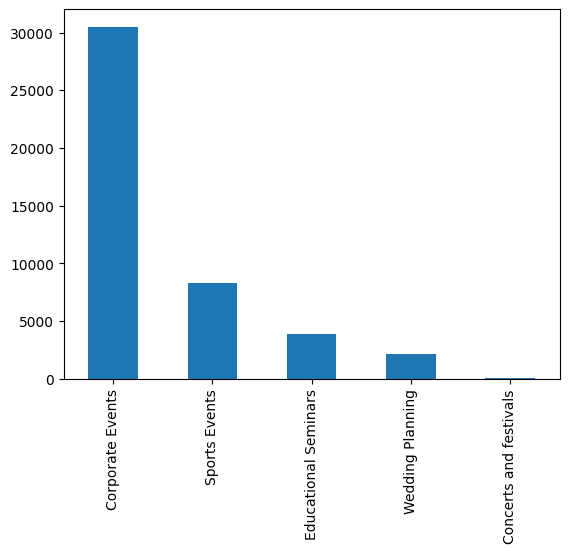

In [38]:
lead["Use Case"].value_counts().plot(kind="bar")

<AxesSubplot: >

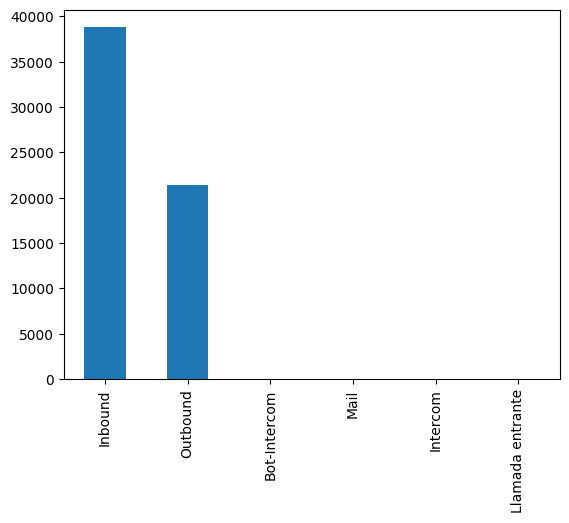

In [39]:
lead["Source"].value_counts().plot(kind="bar")

<AxesSubplot: >

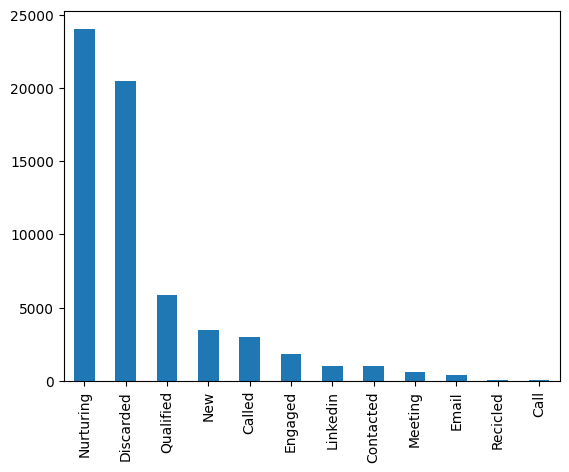

In [40]:
lead["Status"].value_counts().plot(kind="bar")

<AxesSubplot: >

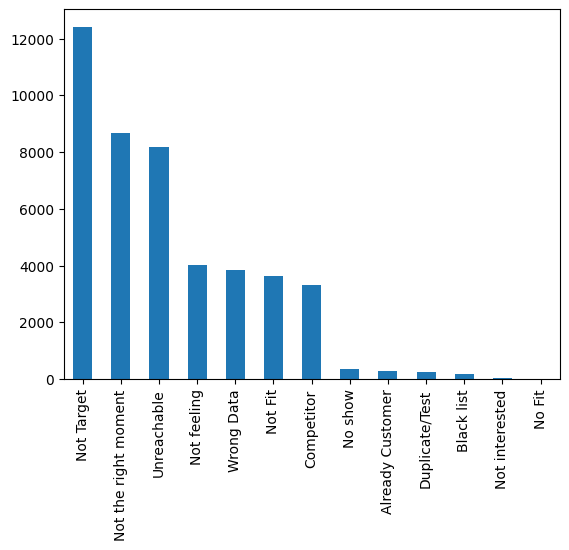

In [41]:
lead["Discarded/Nurturing Reason"].value_counts().plot(kind="bar")

<AxesSubplot: >

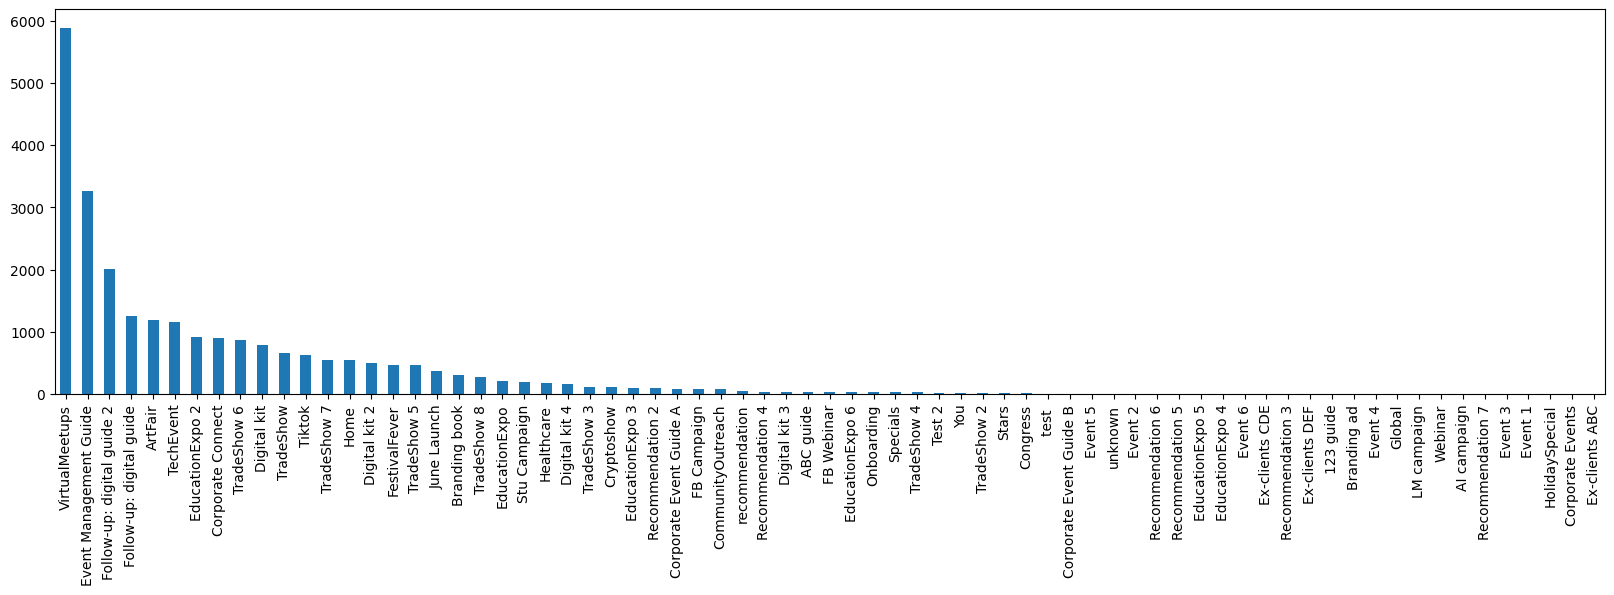

In [42]:
lead["Acquisition Campaign"].value_counts().plot(kind="bar", figsize=(20, 5))

<AxesSubplot: >

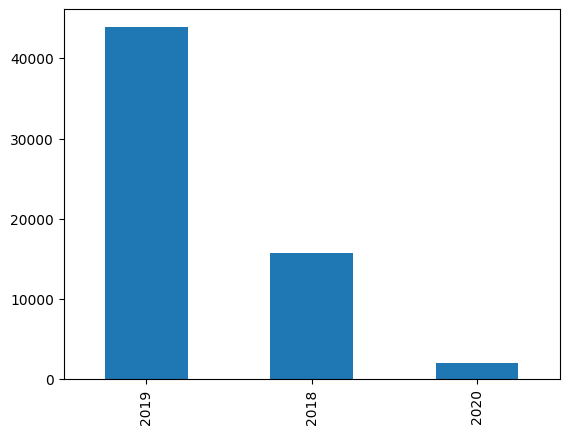

In [43]:
lead["Created Date"] = pd.to_datetime(lead["Created Date"])
lead["Created Date"].dt.year.value_counts().plot(kind="bar")

In [44]:
lead["Created Date"].head()

0   2018-05-26
1   2018-10-17
2   2019-03-29
3   2018-05-26
4   2018-10-17
Name: Created Date, dtype: datetime64[ns]

<AxesSubplot: >

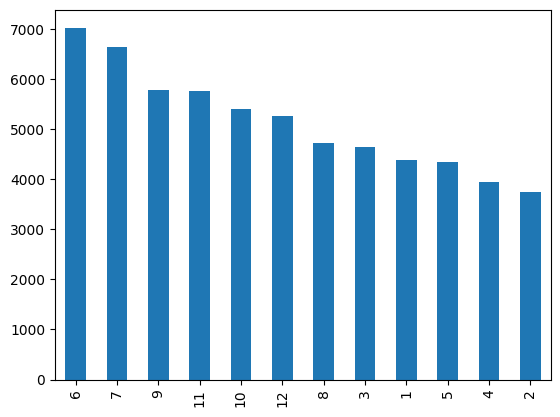

In [45]:
lead["Created Date"].dt.month.value_counts().plot(kind="bar")

<AxesSubplot: >

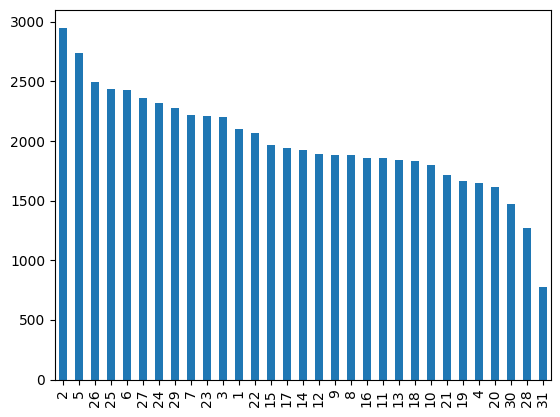

In [46]:
lead["Created Date"].dt.day.value_counts().plot(kind="bar")

<AxesSubplot: >

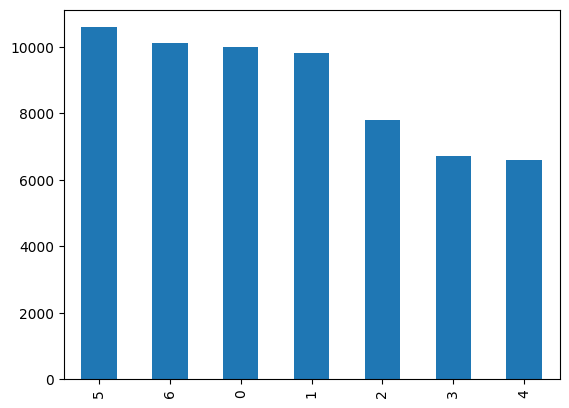

In [47]:
lead["Created Date"].dt.weekday.value_counts().plot(kind="bar")

<AxesSubplot: >

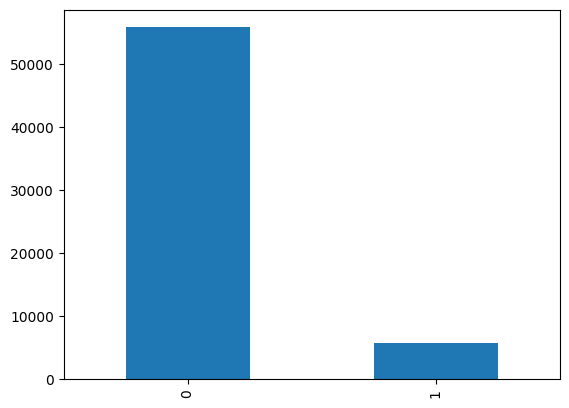

In [48]:
lead["Converted"].value_counts().plot(kind="bar")

<AxesSubplot: >

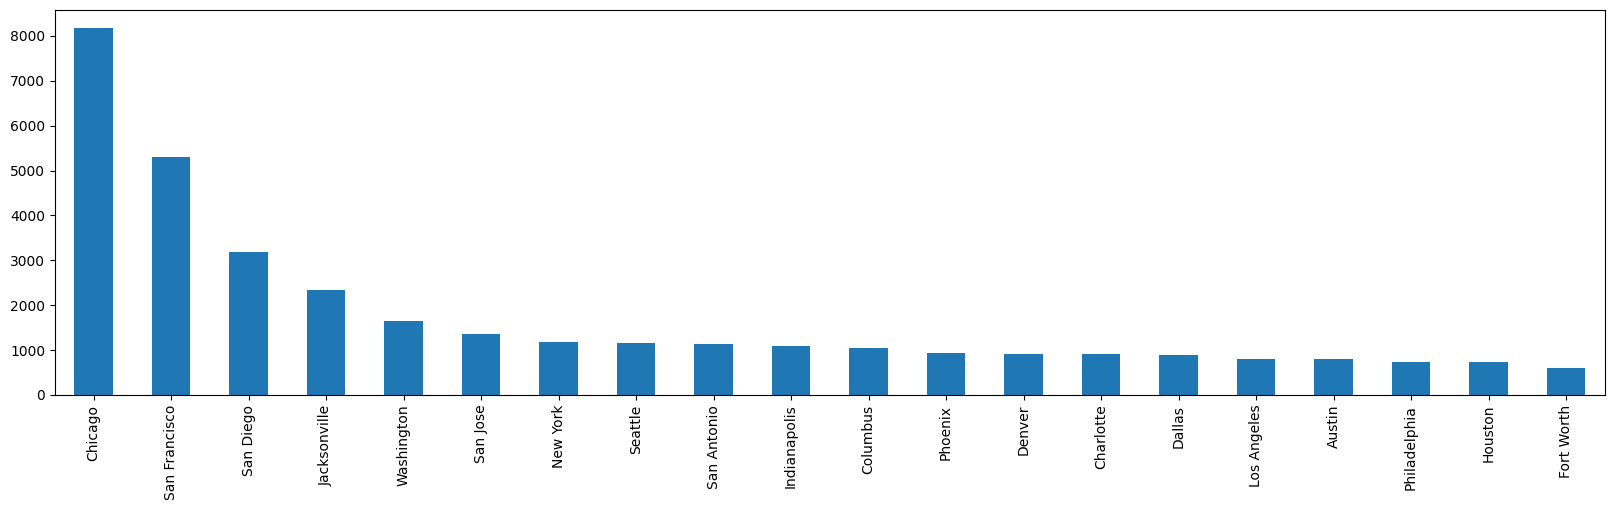

In [49]:
lead["City"].value_counts().plot(kind="bar", figsize=(20, 5))

In [50]:
lead["day"] = lead["Created Date"].dt.day
lead["month"] = lead["Created Date"].dt.month
lead["year"] = lead["Created Date"].dt.year
lead["weekday"] = lead["Created Date"].dt.weekday

lead.drop(columns=["Created Date"], inplace=True)

# Análisis de valores nulos

In [51]:
percentaje = lead.isnull().sum() / lead.shape[0] * 100
print(percentaje)

Id                            28.662048
First Name                    13.626113
Use Case                      27.127306
Source                         2.183682
Status                         0.000000
Discarded/Nurturing Reason    26.720096
Acquisition Campaign          59.365012
Converted                      0.000000
City                          43.332955
day                            0.000000
month                          0.000000
year                           0.000000
weekday                        0.000000
dtype: float64


<AxesSubplot: >

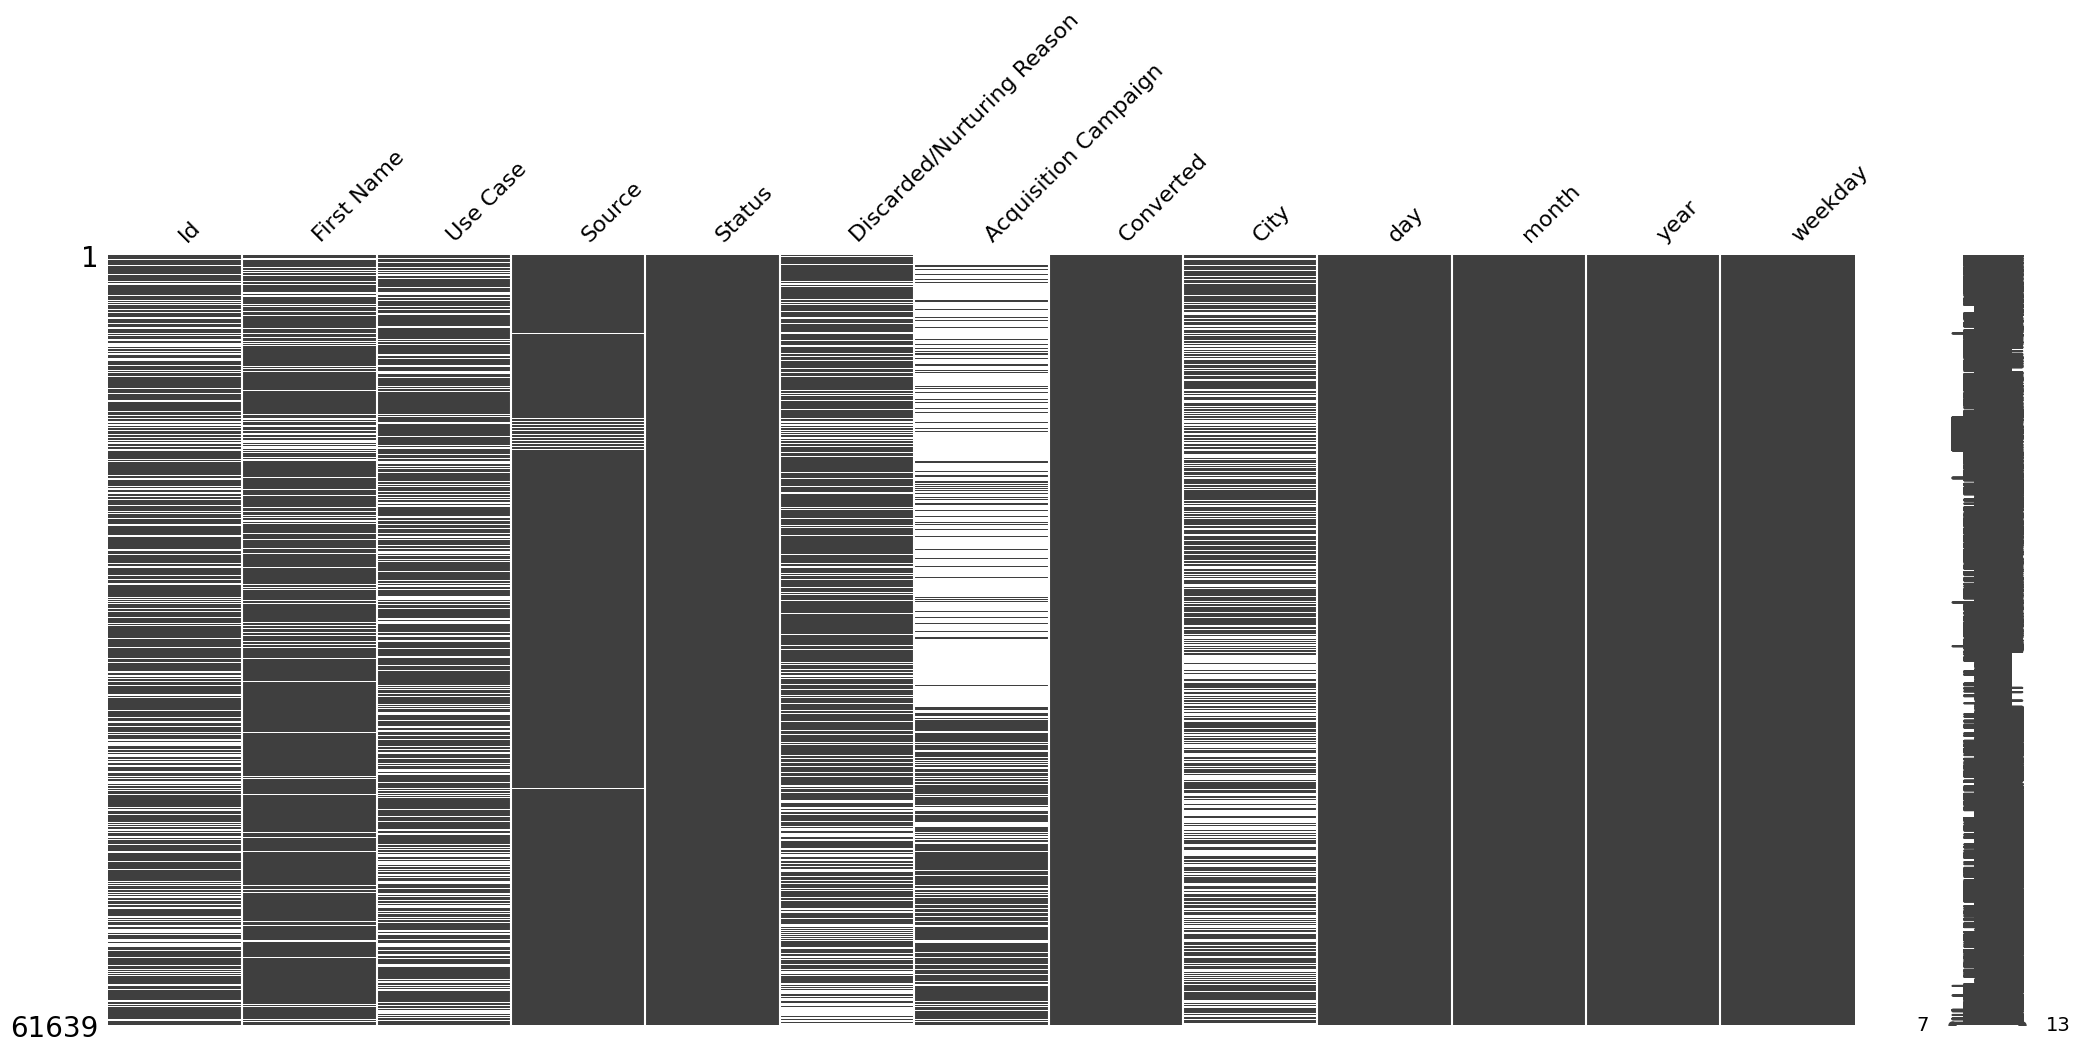

In [52]:
import missingno as msno
msno.matrix(lead)

<AxesSubplot: >

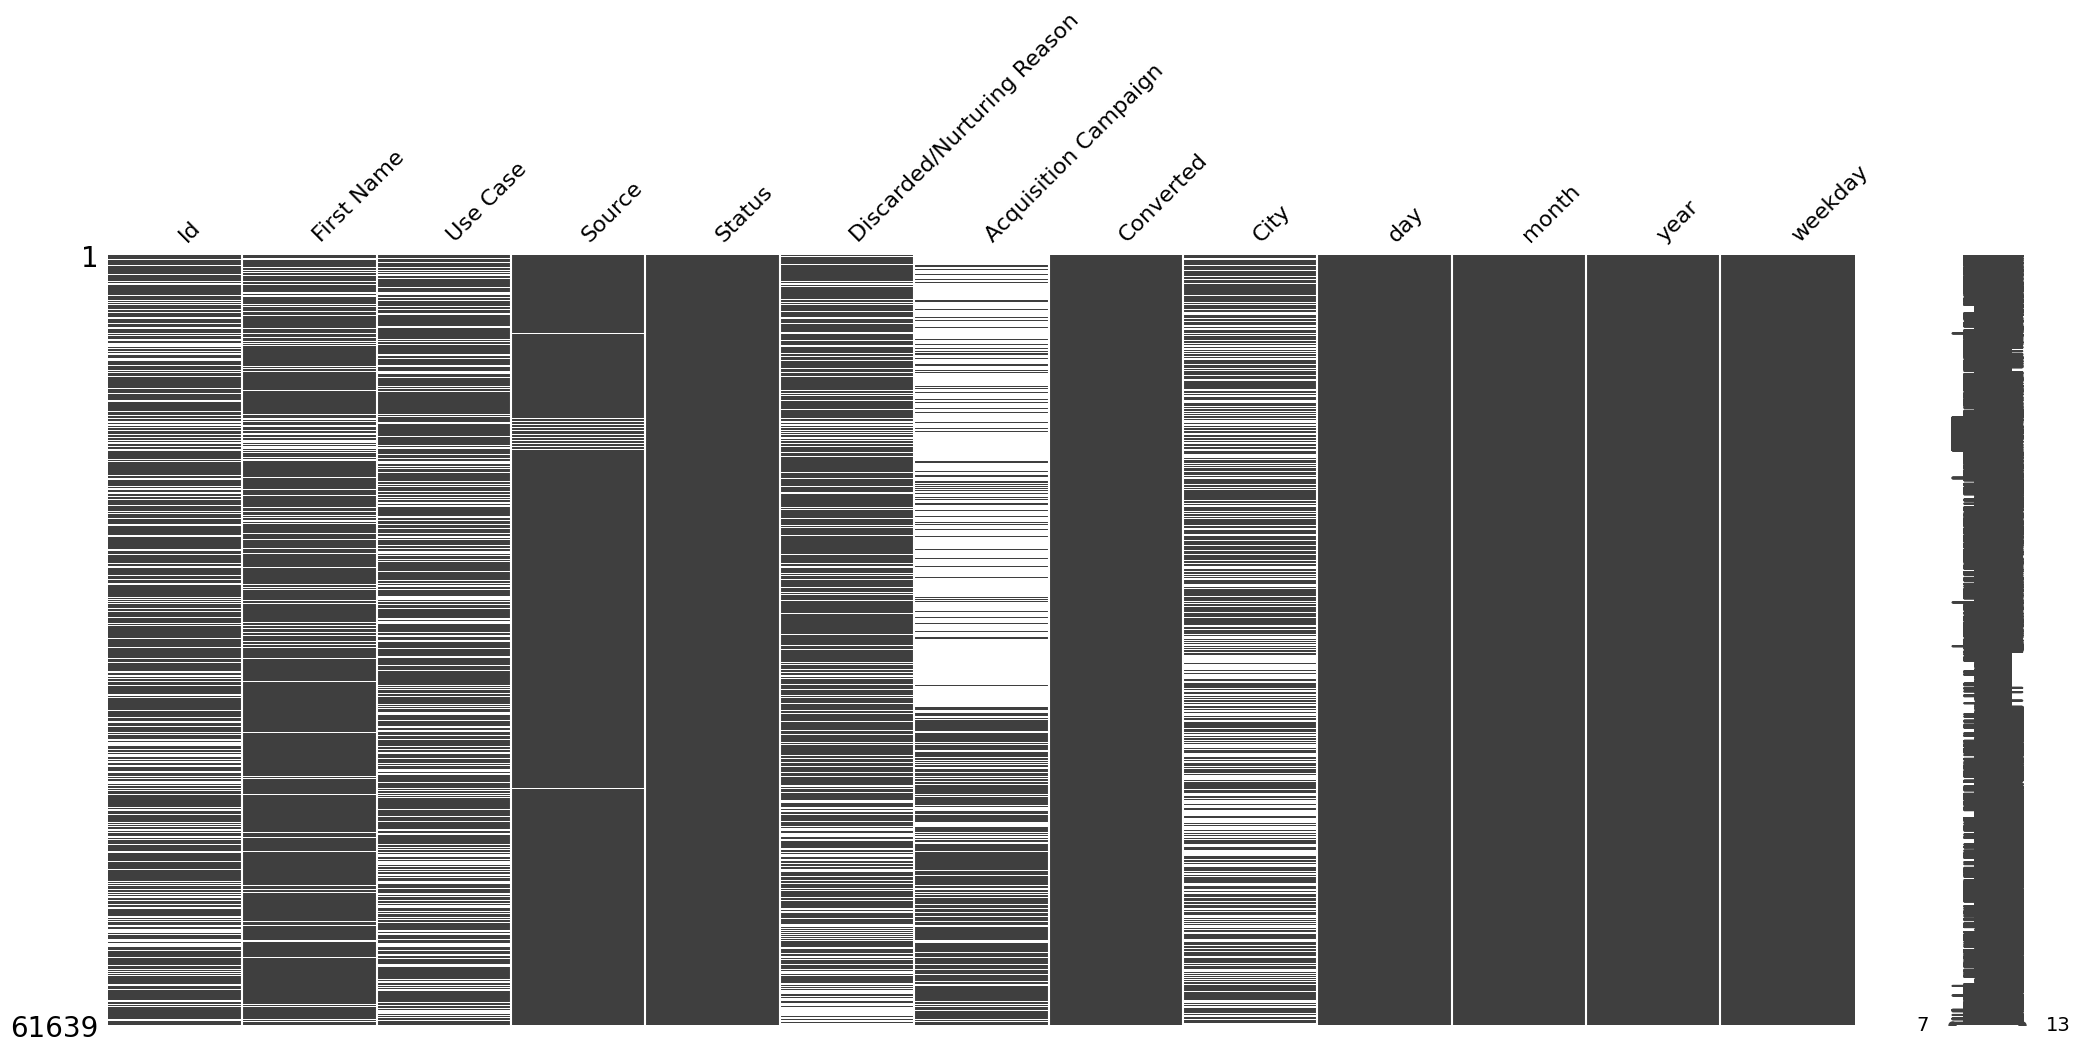

In [53]:
msno.matrix(lead)

<AxesSubplot: >

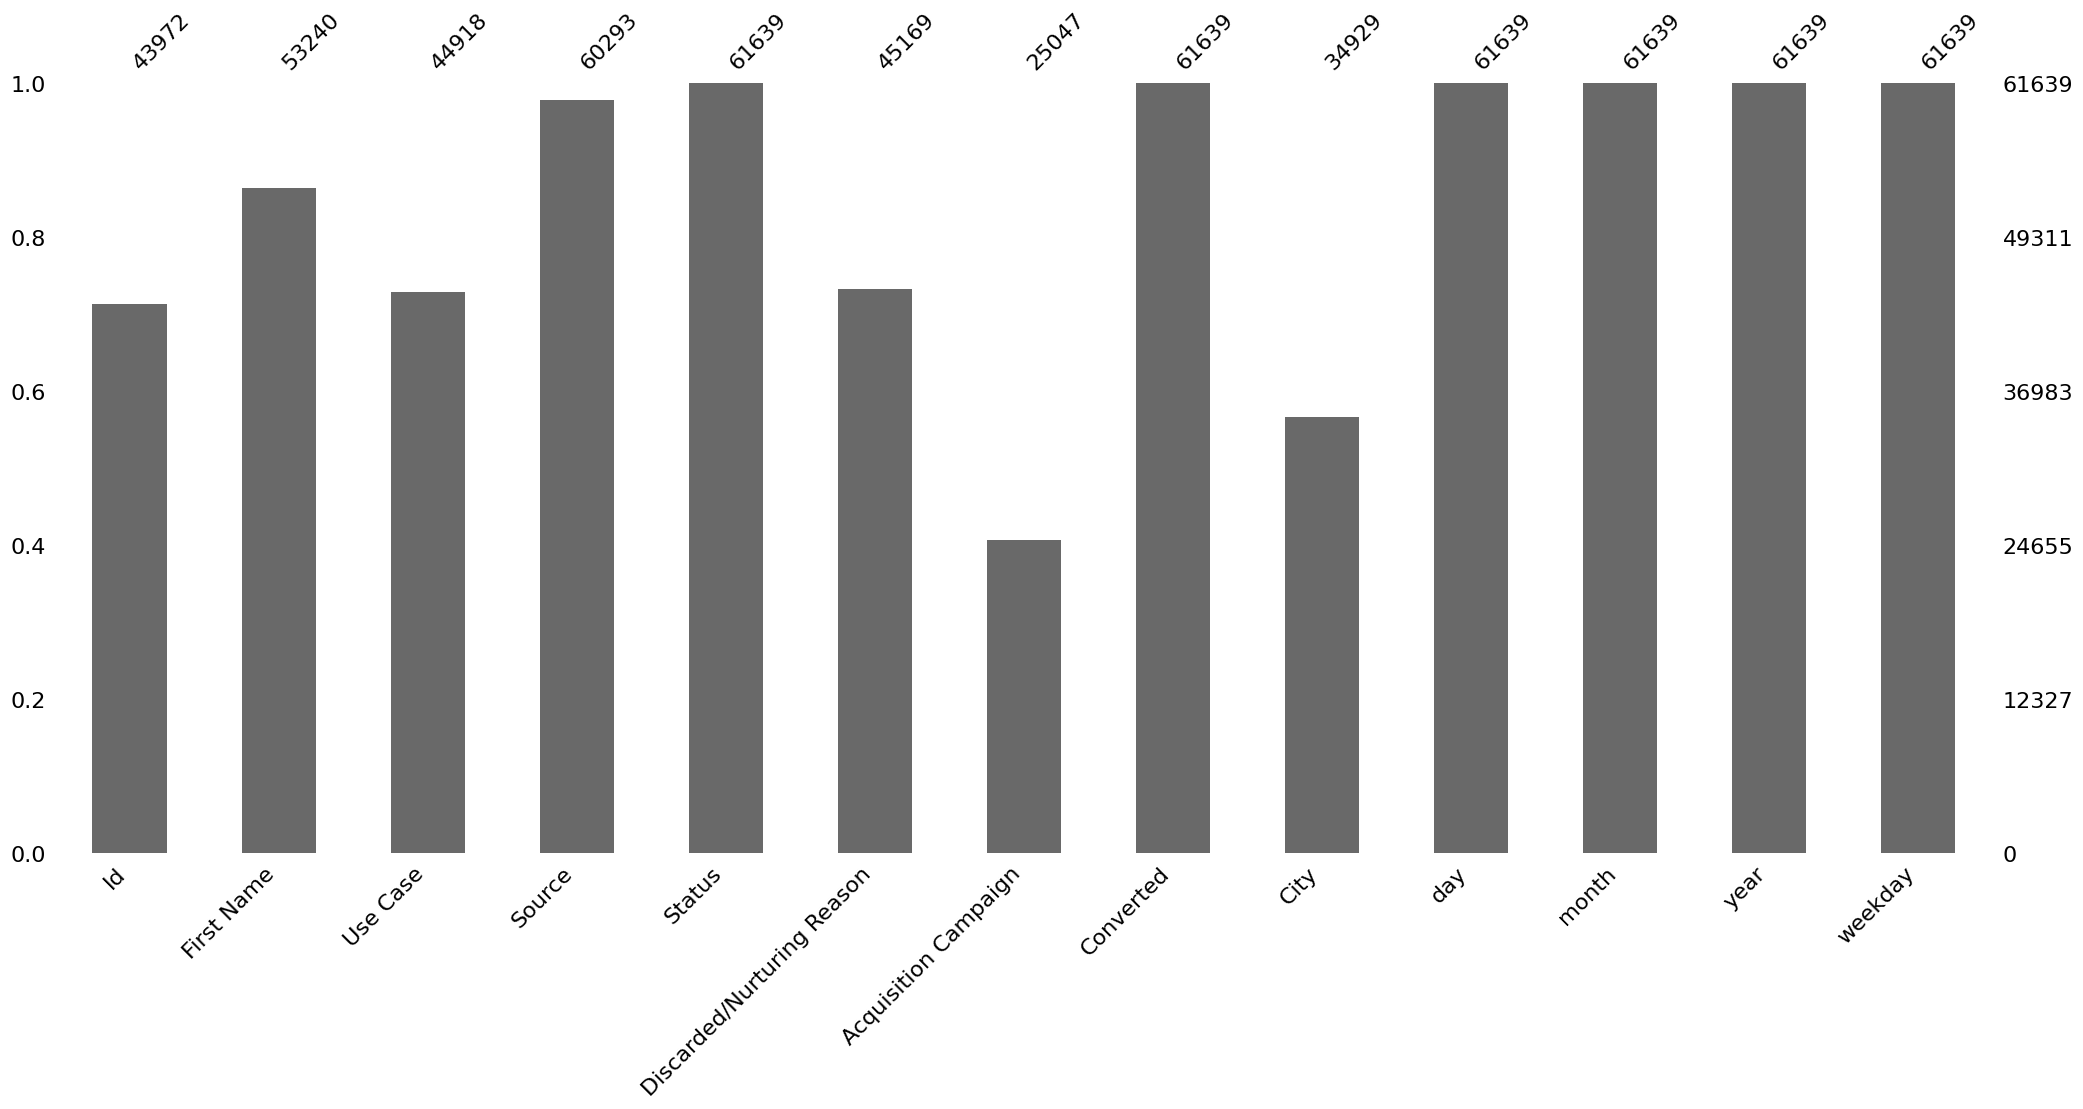

In [54]:
msno.bar(lead)

<AxesSubplot: >

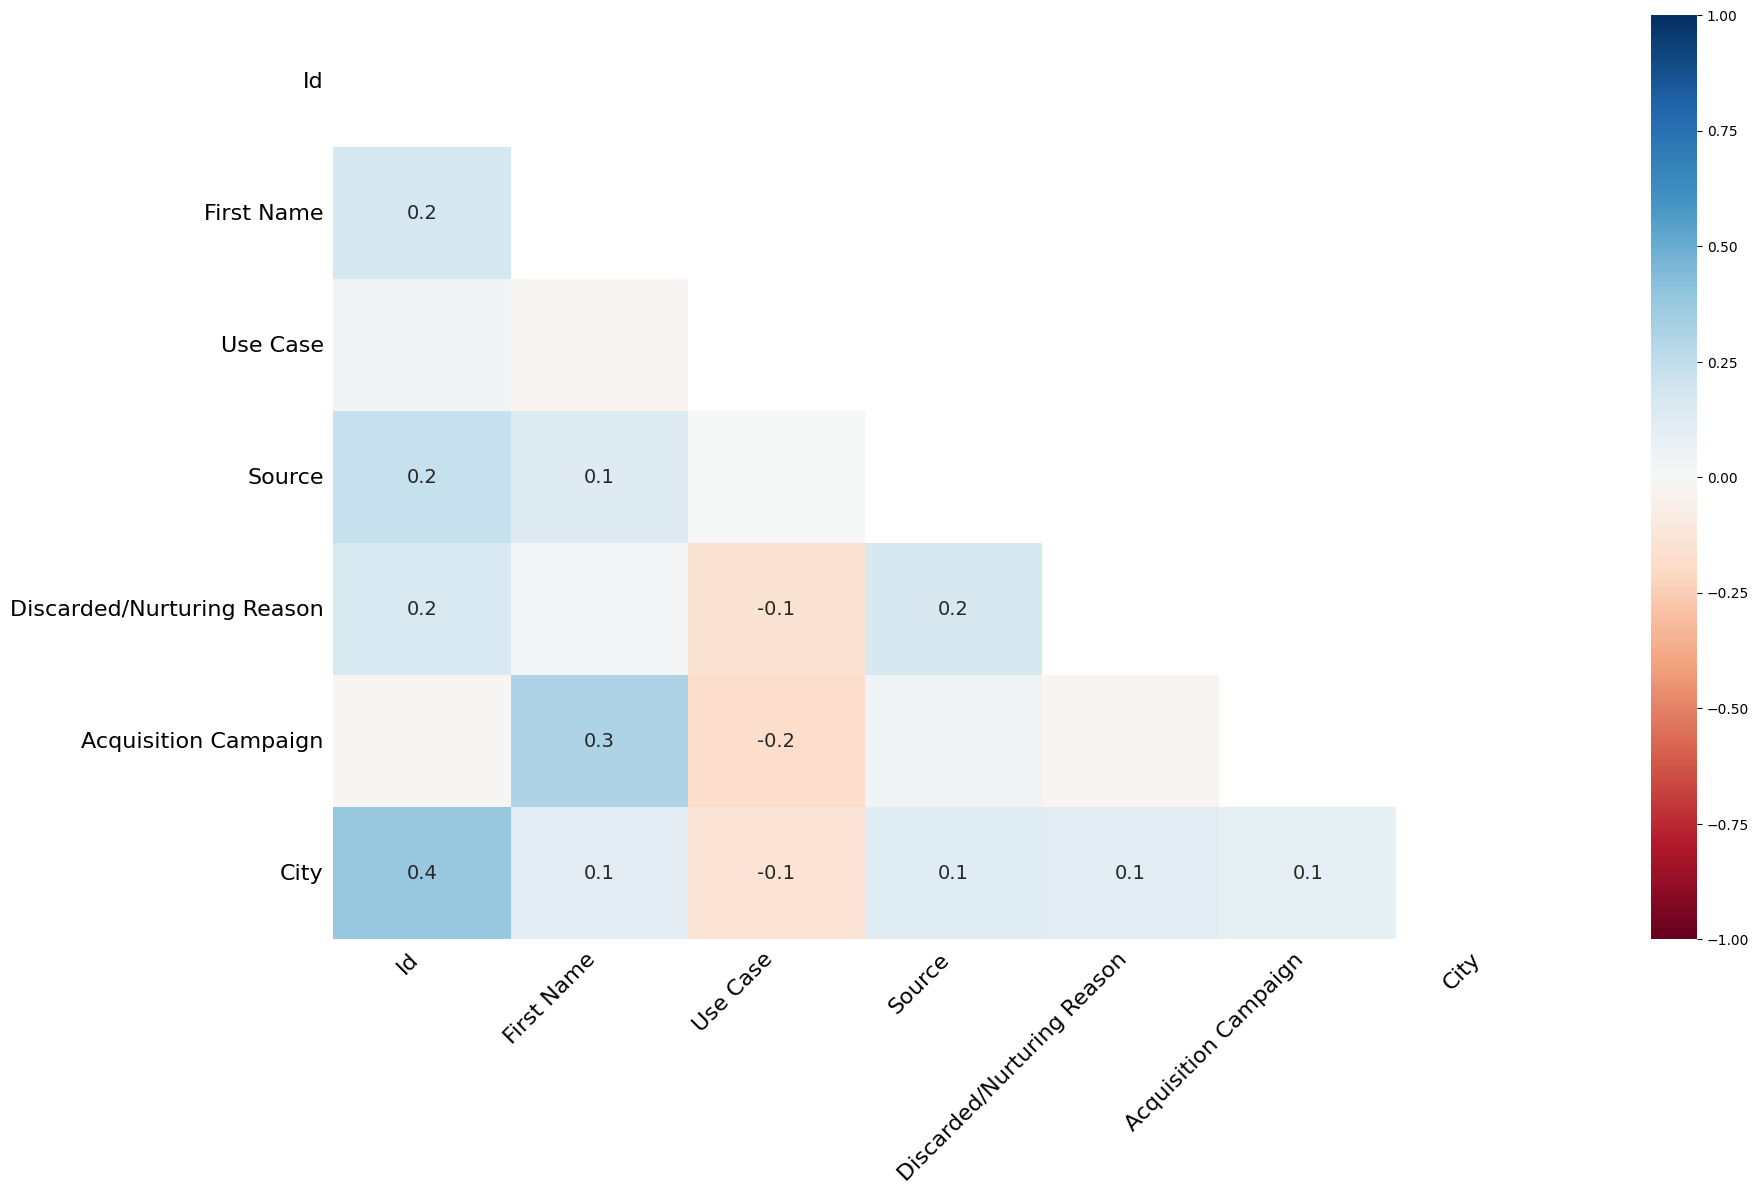

In [55]:
msno.heatmap(lead)

<AxesSubplot: >

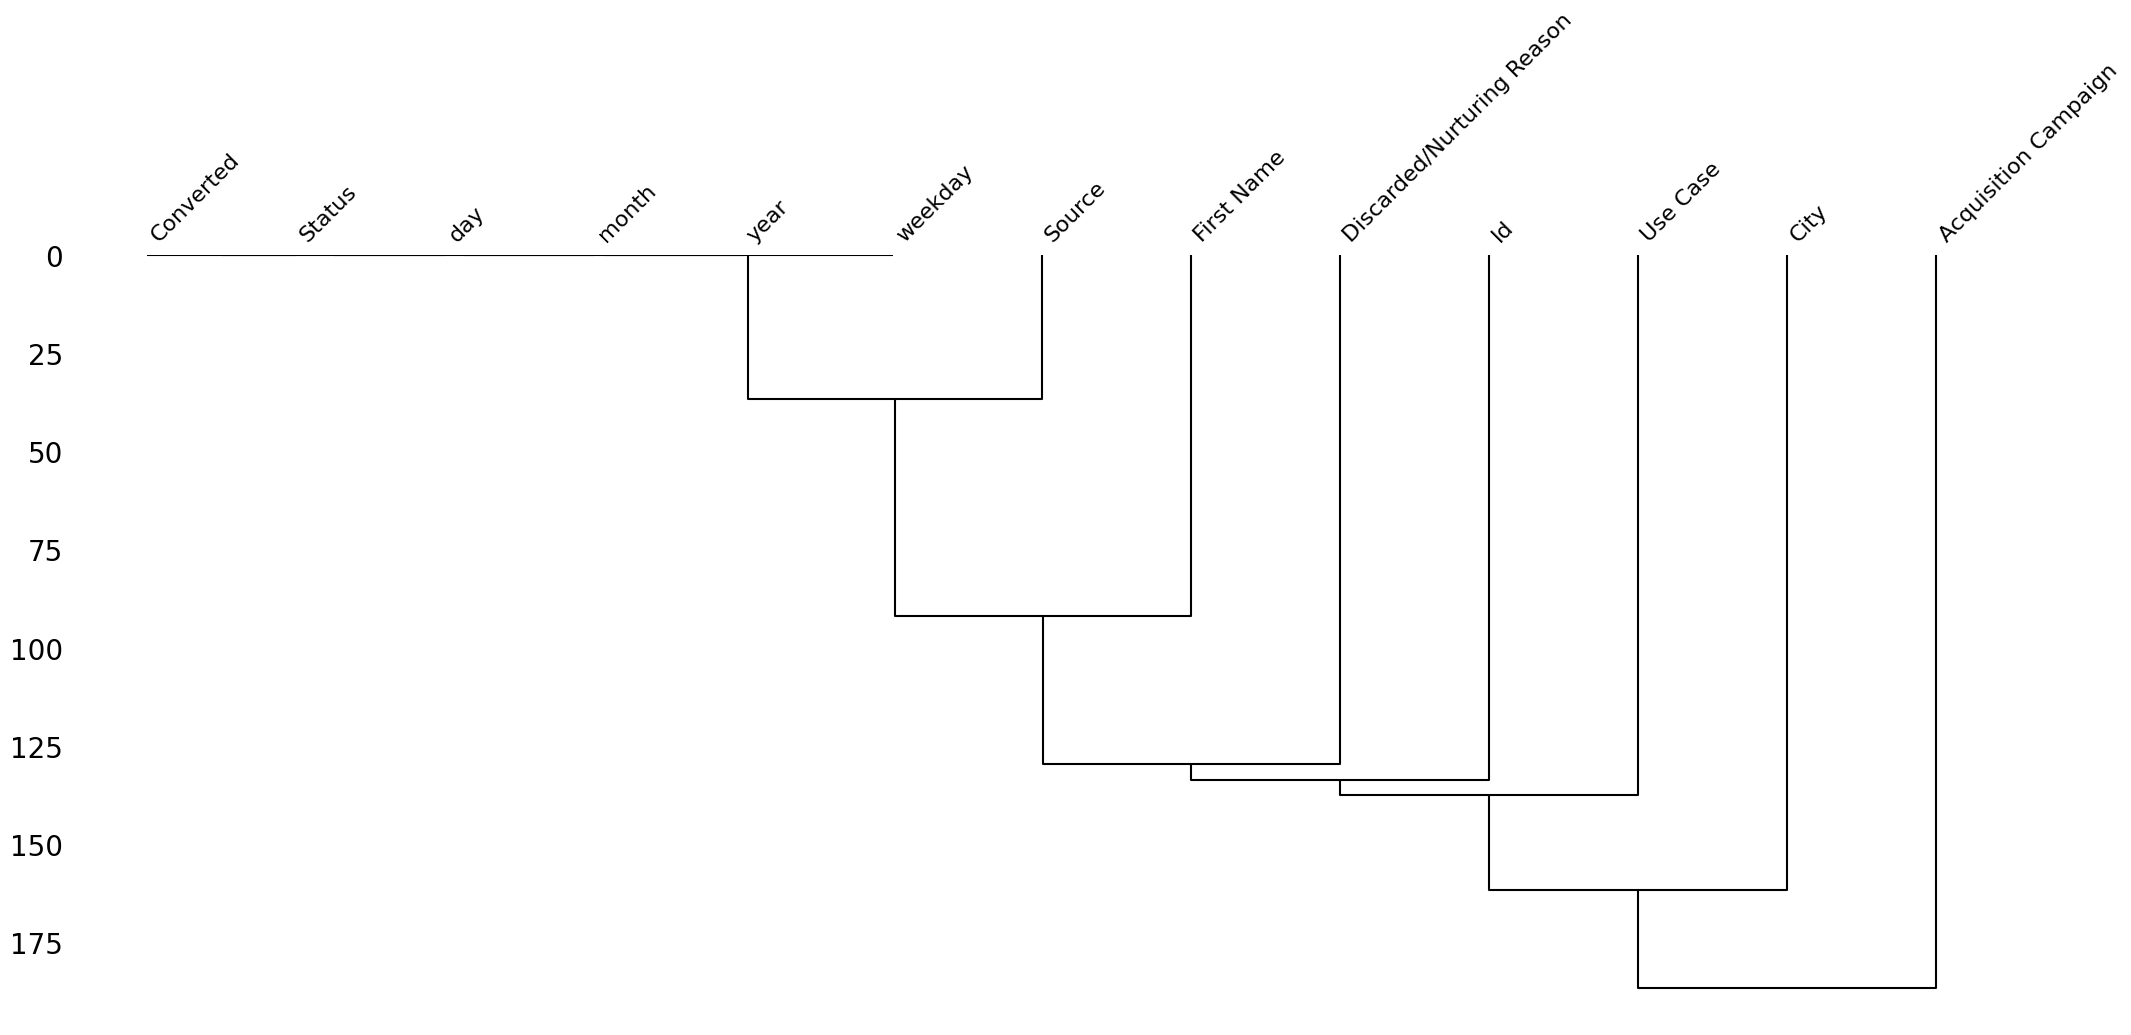

In [56]:
msno.dendrogram(lead)

In [57]:
colums_values_null = lead.columns[lead.isnull().any()].tolist()
colums_values_null

['Id',
 'First Name',
 'Use Case',
 'Source',
 'Discarded/Nurturing Reason',
 'Acquisition Campaign',
 'City']

In [58]:
for column in colums_values_null:
    lead[f"is_null_{column}"] = lead[column].isnull()

# Analisis multivariado

In [59]:
variables_categoricas = list(lead.select_dtypes(include=["object"]).columns)
variables_categoricas += ["Converted", "is_null_Discarded/Nurturing Reason", "is_null_City", "is_null_Acquisition Campaign", "is_null_Source", "is_null_Use Case"]
for variable in variables_categoricas:
    lead[variable] = lead[variable].astype("category")

In [60]:
import association_metrics as am
df = lead.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
# impute for mode
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [61]:
from matplotlib import pyplot as plt
cramers_v = am.CramersV(df)


plt.figsize=(30, 30)
test = cramers_v.fit().round(2)
sns.heatmap(test, annot=True)

MemoryError: Unable to allocate 17.4 GiB for an array with shape (2341069280,) and data type int64

<AxesSubplot: >

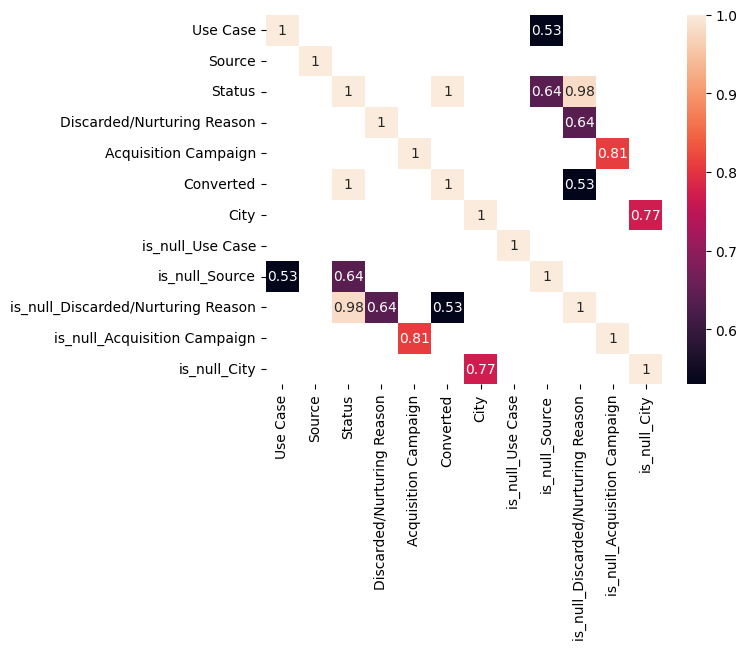

In [62]:
sns.heatmap(test[test >= 0.5], annot=True)

In [65]:
lead.to_csv(PATH_DATASET / "leads_transform.csv", index=False)